# Esercizio sul filtro di Gabor

In [1]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

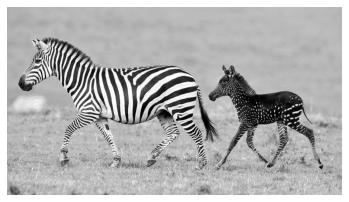

In [2]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

myimshow(zebra)

In [3]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

## Generazione del filtro Gabor per i differenti parametri

Variando i parametri theta e omega si ottengono le differenti risposte del filtro.

Si nota come i valori dei parametri influiscano sulla rotazione e sull'ampiezza del filtro

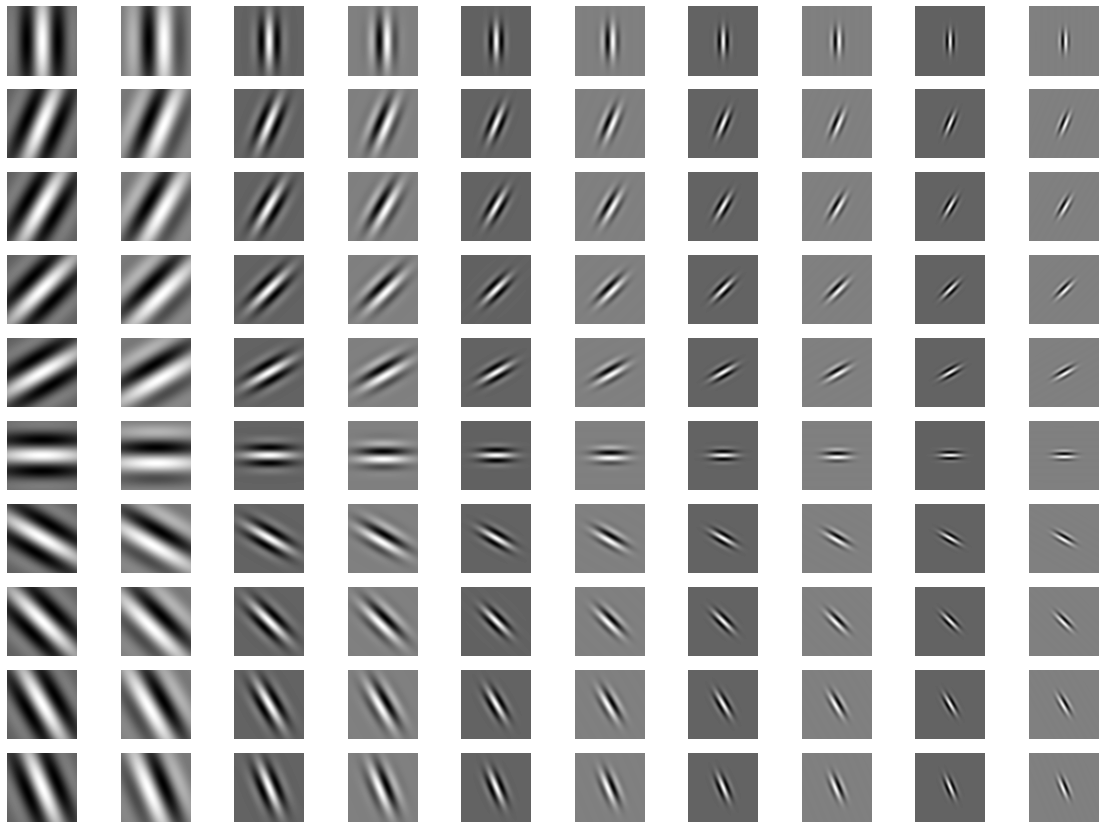

In [4]:
frequencies = [0.1,0.2,0.3,0.4,0.5]
rotations = [0,np.pi/8,np.pi/6,np.pi/4,np.pi/3,np.pi/2,2*np.pi/3,3*np.pi/4,5*np.pi/6,7*np.pi/8]

cols = 2*len(frequencies)
rows = len(rotations)

sz = (128,128)

filterbanks = []

fig, axes = plt.subplots(rows,cols,figsize=(20,15))

for i,rot in enumerate(rotations): 
    for j,freq in enumerate(frequencies):
        filt = genGabor(sz,freq,rot)
        filterbanks = filterbanks + [filt]
        axes[i][2*j].imshow(filt, "gray")
        axes[i][2*j].axis('off')
        filt = genGabor(sz,freq,rot,func=np.sin)
        filterbanks = filterbanks + [filt]
        axes[i][2*j+1].imshow(filt, "gray")
        axes[i][2*j+1].axis('off')

plt.show()



## Applicazione del filtro all'immagine

Applicando il filtro all'immagine si osserva come vengano evidenziate le parti dell'immagine solidali al filtro mentre vengano annullate tutte le altre componenti.

Quindi il filtro evidenzia i pattern che *rispondono* all'orientamento e all'ampiezza del filtro mentre ignorano tutto il resto. Questo tipo di comportamento è utile per individuare la texture presente in un'immagine

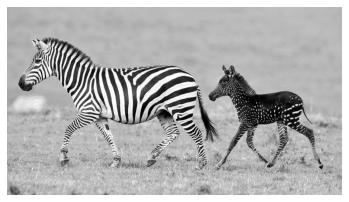

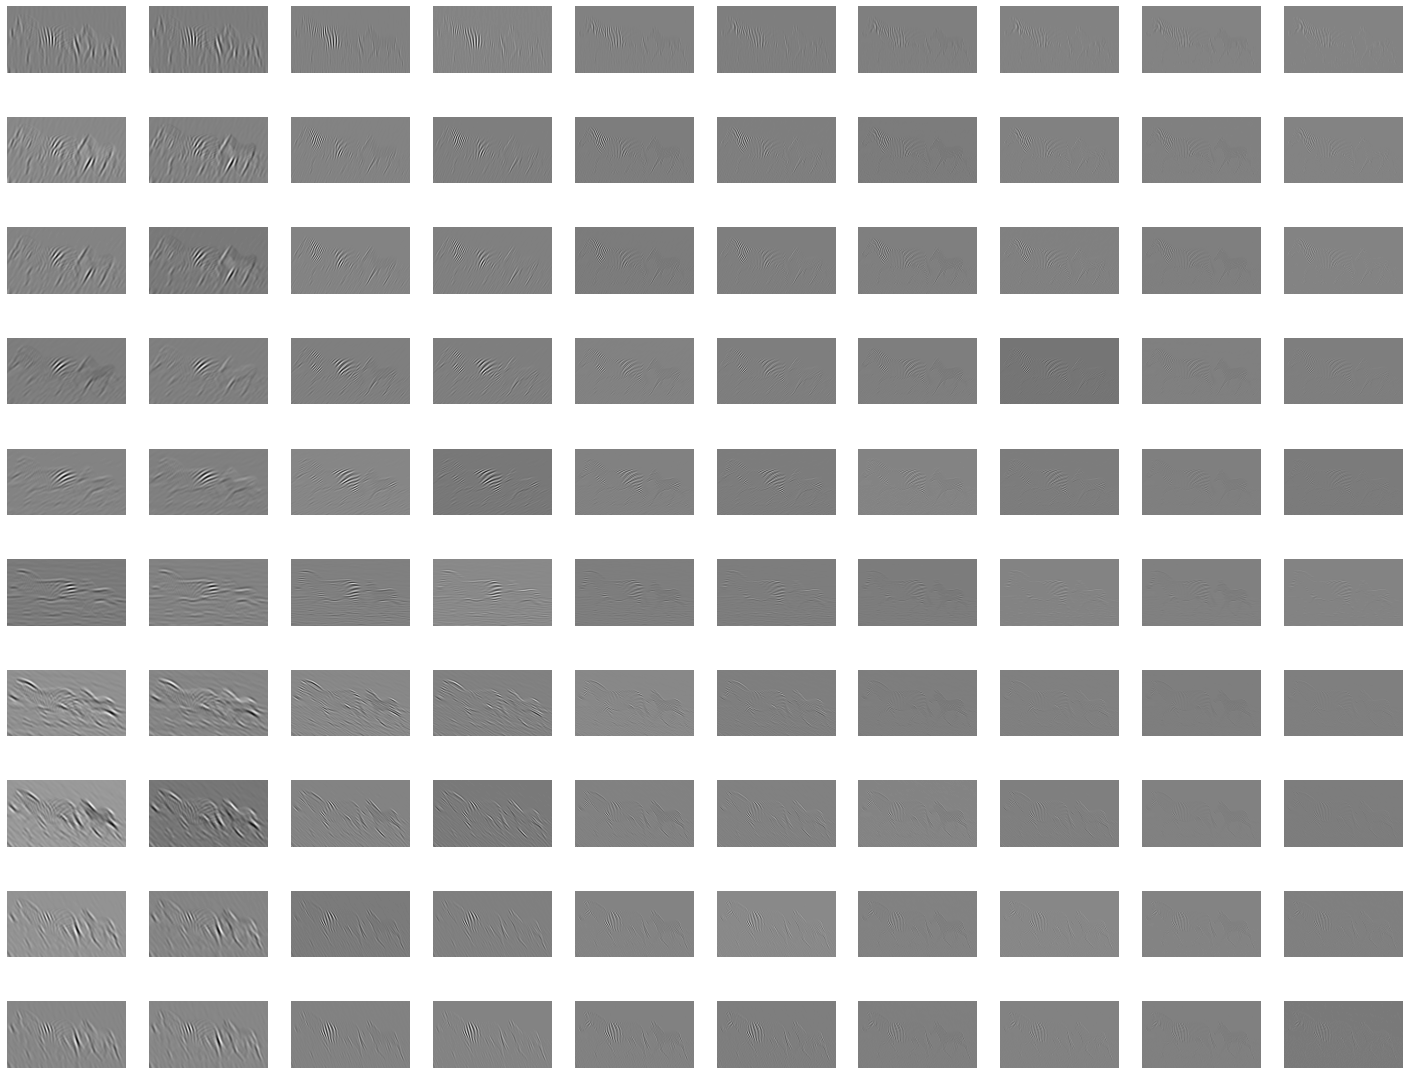

In [5]:
myimshow(zebra)

fig, axes = plt.subplots(rows,cols,figsize=(25,20))

k = 0
for i,rot in enumerate(rotations): 
    for j,freq in enumerate(frequencies):
        axes[i][2*j].imshow(convolve(zebra,filterbanks[k]), "gray")
        axes[i][2*j].axis('off')
        axes[i][2*j+1].imshow(convolve(zebra,filterbanks[k+1]), "gray")
        axes[i][2*j+1].axis('off')
        
        k +=2

plt.show()

## Individuazione delle linee in un'immagine

In [44]:

img = rgb2gray(imageio.imread('gabor1.jpg'))


frequencies = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
rotations = [2, 4, 6, 8]

rows = 2 * len(frequencies)
cols = len(rotations)

sz = (64, 64)


DATA = []

for i,freq in enumerate(frequencies):
    for j,rot in enumerate(rotations): 
        filter_cos = genGabor(sz,freq,np.pi / rot)
        
        DATA.append((convolve(img,filter_cos), f'pi/{rot}, omega={freq:.1f}, cos'))

    for j,rot in enumerate(rotations): 
        filter_sin = genGabor(sz,freq,np.pi / rot, np.sin)
        
        DATA.append((convolve(img,filter_sin), f'pi/{rot}, omega={freq:.1f}, sin'))
        

<ipython-input-44-f41efa507c05>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(imageio.imread('gabor1.jpg'))


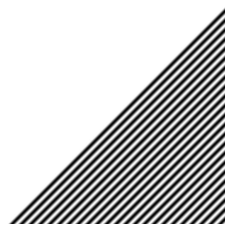

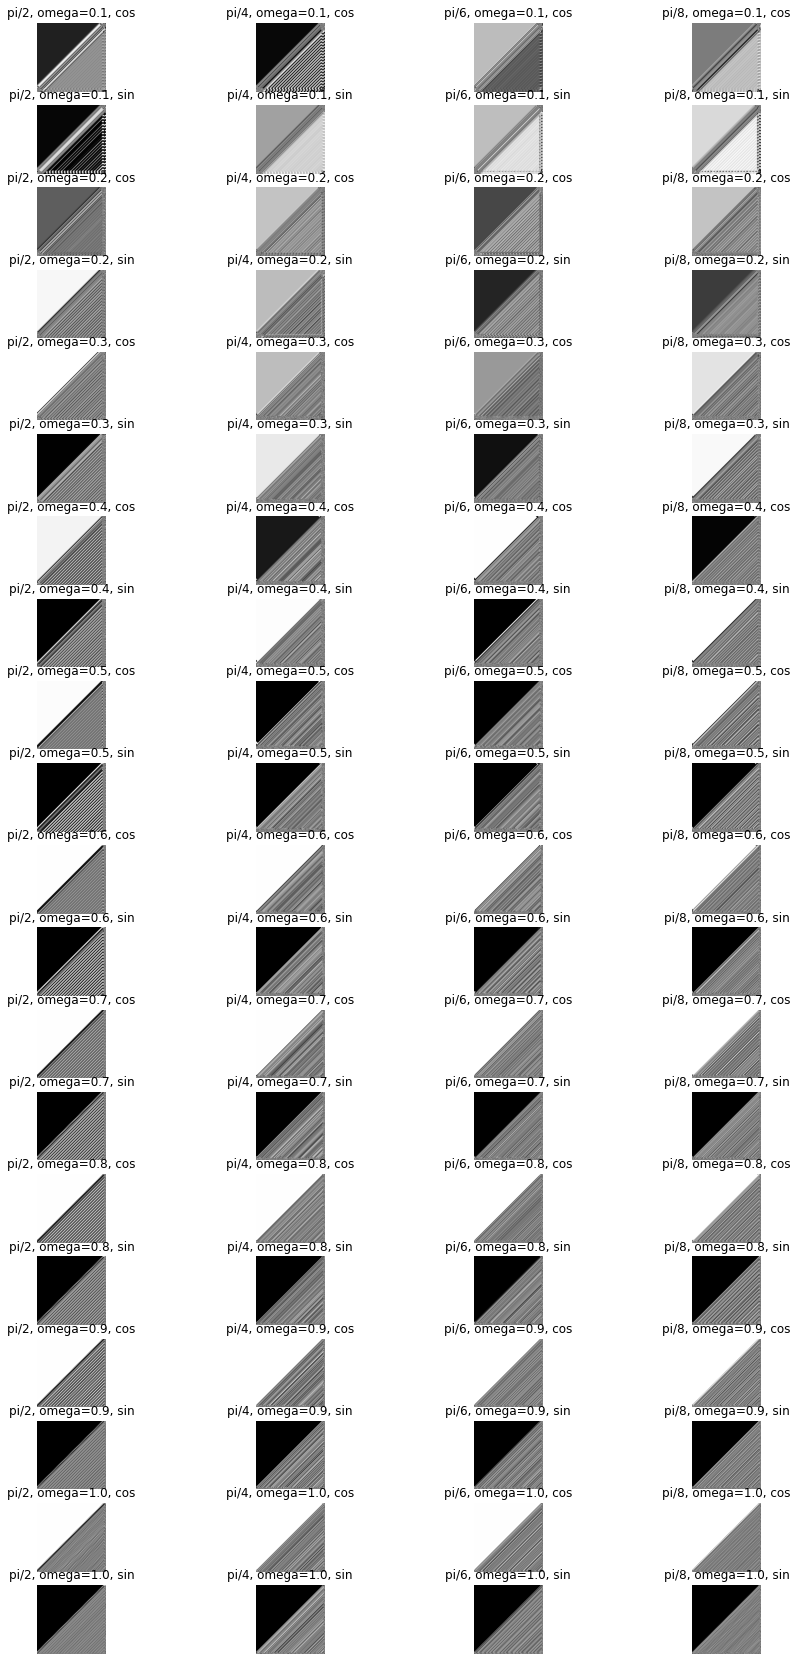

In [45]:
myimshow(img)

sz = (64, 64)
fig, axes = plt.subplots(rows,cols,figsize=(15, 30))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(DATA[i][0], "gray")
    ax.axis('off')
    ax.set_title(DATA[i][1])

plt.show()


Data l'immagine target, si cercano i valori corretti dei parametri da applicare al filtro cercando tra i possibili valori in un range predefinito. 

In questo caso si prediligono valori per i quali si possano riconoscere le linee oblique.

Nella cella precedente sono mostrati i risultati del filtro per valori definiti nelle liste **frequencies** e **rotations**. I valori corretti sono quelli che producono un'immagine che *riproduca* la spaziatura tra le righe e concorde con l'orientamento. 

Quello che più adatto all'immagine in input è il filtro con theta=np.pi/4 e omega=.4